In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
from pulp import *
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math

In [77]:
data = pd.read_excel('/content/drive/MyDrive/Cutting Stock3.xlsx' , sheet_name= 'เหล็กกล่อง T3.2 X 38 X 38 X6000' )
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,เหล็กกล่อง T3.2 X 38 X 38 X6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,6000,work1,work2,work3,work4,work5,NaN,NaN,NaN
2,NaN,NaN,NaN,Length part +5,1428,1228,1725,275,1045,NaN,NaN,NaN
3,NaN,NaN,NaN,QTY,6,6,4,2,3,length MIN,lose all,Steel all
4,NaN,NaN,NaN,Length part,1423,1223,1720,270,1040,270,1754,5
5,NaN,NaN,NaN,Pattern,,NaN,NaN,NaN,NaN,length USE,lose,Steel
6,NaN,NaN,NaN,1,4,0,0,1,0,5987,13,0
7,NaN,NaN,NaN,2,4,0,0,0,0,5712,288,0
8,NaN,NaN,NaN,3,3,1,0,1,0,5787,213,0
9,NaN,NaN,NaN,4,3,1,0,0,0,5512,488,0


In [78]:
data = pd.read_excel('/content/drive/MyDrive/Cutting Stock3.xlsx' , sheet_name= 'เหล็กกล่อง T3.2 X 38 X 38 X6000' , usecols = 'd:l',header =2  )
data


,6000,work1,work2,work3,work4,work5,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Length part +5,1428,1228.0,1725.0,275.0,1045.0,NaN,NaN,NaN
1,QTY,6,6.0,4.0,2.0,3.0,length MIN,lose all,Steel all
2,Length part,1423,1223.0,1720.0,270.0,1040.0,270,1754,5
3,Pattern,,NaN,NaN,NaN,NaN,length USE,lose,Steel
4,1,4,0.0,0.0,1.0,0.0,5987,13,0
5,2,4,0.0,0.0,0.0,0.0,5712,288,0
6,3,3,1.0,0.0,1.0,0.0,5787,213,0
7,4,3,1.0,0.0,0.0,0.0,5512,488,0
8,5,3,0.0,0.0,1.0,1.0,5604,396,0
9,6,3,0.0,0.0,0.0,1.0,5329,671,0


In [79]:
data.shape # row , column

(31, 9)

In [80]:
print(data.shape[0]) #nrow

31


In [81]:
data.drop(30 ,axis=0 ,inplace =True) 

In [82]:
data

,6000,work1,work2,work3,work4,work5,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Length part +5,1428,1228.0,1725.0,275.0,1045.0,NaN,NaN,NaN
1,QTY,6,6.0,4.0,2.0,3.0,length MIN,lose all,Steel all
2,Length part,1423,1223.0,1720.0,270.0,1040.0,270,1754,5
3,Pattern,,NaN,NaN,NaN,NaN,length USE,lose,Steel
4,1,4,0.0,0.0,1.0,0.0,5987,13,0
5,2,4,0.0,0.0,0.0,0.0,5712,288,0
6,3,3,1.0,0.0,1.0,0.0,5787,213,0
7,4,3,1.0,0.0,0.0,0.0,5512,488,0
8,5,3,0.0,0.0,1.0,1.0,5604,396,0
9,6,3,0.0,0.0,0.0,1.0,5329,671,0


In [83]:
data.columns 

Index([         6000,       'work1',       'work2',       'work3',
             'work4',       'work5',  'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11'],
      dtype='object')

In [84]:
name_work = data.columns[1:6] #list
name_work

Index(['work1', 'work2', 'work3', 'work4', 'work5'], dtype='object')

In [85]:
data.iloc[:,0].values #list 
name_pattern = data.iloc[:,0].values 
name_pattern

array(['Length part +5', 'QTY', 'Length part', 'Pattern', 1, 2, 3, 4, 5,
       6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26], dtype=object)

In [86]:
name_pattern = name_pattern[4:]
name_pattern 

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26], dtype=object)

In [87]:
name_pattern  = np.array(['pattern_'+str(i) for i in name_pattern])
name_pattern 

array(['pattern_1', 'pattern_2', 'pattern_3', 'pattern_4', 'pattern_5',
       'pattern_6', 'pattern_7', 'pattern_8', 'pattern_9', 'pattern_10',
       'pattern_11', 'pattern_12', 'pattern_13', 'pattern_14',
       'pattern_15', 'pattern_16', 'pattern_17', 'pattern_18',
       'pattern_19', 'pattern_20', 'pattern_21', 'pattern_22',
       'pattern_23', 'pattern_24', 'pattern_25', 'pattern_26'],
      dtype='<U10')

In [88]:
piece_work ={}
for i in range(len(name_pattern)):
  for j in range(len(name_work)) :
     piece_work[ (name_pattern[i], name_work[j]) ] = data.iloc[i+4 ,j+1]
piece_work

{('pattern_1', 'work1'): 4,
 ('pattern_1', 'work2'): 0.0,
 ('pattern_1', 'work3'): 0.0,
 ('pattern_1', 'work4'): 1.0,
 ('pattern_1', 'work5'): 0.0,
 ('pattern_2', 'work1'): 4,
 ('pattern_2', 'work2'): 0.0,
 ('pattern_2', 'work3'): 0.0,
 ('pattern_2', 'work4'): 0.0,
 ('pattern_2', 'work5'): 0.0,
 ('pattern_3', 'work1'): 3,
 ('pattern_3', 'work2'): 1.0,
 ('pattern_3', 'work3'): 0.0,
 ('pattern_3', 'work4'): 1.0,
 ('pattern_3', 'work5'): 0.0,
 ('pattern_4', 'work1'): 3,
 ('pattern_4', 'work2'): 1.0,
 ('pattern_4', 'work3'): 0.0,
 ('pattern_4', 'work4'): 0.0,
 ('pattern_4', 'work5'): 0.0,
 ('pattern_5', 'work1'): 3,
 ('pattern_5', 'work2'): 0.0,
 ('pattern_5', 'work3'): 0.0,
 ('pattern_5', 'work4'): 1.0,
 ('pattern_5', 'work5'): 1.0,
 ('pattern_6', 'work1'): 3,
 ('pattern_6', 'work2'): 0.0,
 ('pattern_6', 'work3'): 0.0,
 ('pattern_6', 'work4'): 0.0,
 ('pattern_6', 'work5'): 1.0,
 ('pattern_7', 'work1'): 3,
 ('pattern_7', 'work2'): 0.0,
 ('pattern_7', 'work3'): 0.0,
 ('pattern_7', 'work4'):

In [89]:
demand = {}
for i in range(len(name_work)):
  demand[name_work[i]] = data.iloc[1 ,i+1]
demand

{'work1': 6, 'work2': 6.0, 'work3': 4.0, 'work4': 2.0, 'work5': 3.0}

In [90]:
length_part = {}
for i in range(len(name_work)):
  length_part[name_work[i]] = data.iloc[2,i+1]
length_part

{'work1': 1423,
 'work2': 1223.0,
 'work3': 1720.0,
 'work4': 270.0,
 'work5': 1040.0}

In [91]:
lose = {}
for i in range(len(name_pattern)):
  lose[name_pattern[i]] = data.iloc[i+4,7]
lose

{'pattern_1': 13,
 'pattern_2': 288,
 'pattern_3': 213,
 'pattern_4': 488,
 'pattern_5': 396,
 'pattern_6': 671,
 'pattern_7': 121,
 'pattern_8': 138,
 'pattern_9': 374,
 'pattern_10': 99,
 'pattern_11': 191,
 'pattern_12': 596,
 'pattern_13': 43,
 'pattern_14': 321,
 'pattern_15': 41,
 'pattern_16': 591,
 'pattern_17': 338,
 'pattern_18': 226,
 'pattern_19': 134,
 'pattern_20': 409,
 'pattern_21': 275,
 'pattern_22': 825,
 'pattern_23': 550,
 'pattern_24': 185,
 'pattern_25': 277,
 'pattern_26': 77}

In [92]:
cost_steel = 1000

In [93]:
# define problem 
cutmodel = LpProblem(' Rack Cutting Model', LpMinimize)

#define variabe , name,index list ,lower, upper , type variabl
x = LpVariable.dict('x',name_pattern  ,lowBound=0, cat =LpInteger)

# objective function 
cutmodel += lpSum( x[i]*cost_steel for i in name_pattern) 

#demand constrain 
for j in name_work :
  cutmodel += lpSum(x[i] *piece_work[(i,j)] for i in name_pattern) >= demand[j]

/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [94]:
def optimal_sol_min(model) :
  model.solve() 
  print(model)
  print("Status Model:",LpStatus[model.status]) #check status model
  print("Opjective Funtion [Min_Cost]  = " , value(model.objective) ,"Baht") #เเสดงค่าobjective function
  for a in model.variables():
    if a.varValue >0  : 
       print(a.name ,"=",a.varValue) 
  

In [95]:
optimal_sol_min(cutmodel)

_Rack_Cutting_Model:
MINIMIZE
1000*x_pattern_1 + 1000*x_pattern_10 + 1000*x_pattern_11 + 1000*x_pattern_12 + 1000*x_pattern_13 + 1000*x_pattern_14 + 1000*x_pattern_15 + 1000*x_pattern_16 + 1000*x_pattern_17 + 1000*x_pattern_18 + 1000*x_pattern_19 + 1000*x_pattern_2 + 1000*x_pattern_20 + 1000*x_pattern_21 + 1000*x_pattern_22 + 1000*x_pattern_23 + 1000*x_pattern_24 + 1000*x_pattern_25 + 1000*x_pattern_26 + 1000*x_pattern_3 + 1000*x_pattern_4 + 1000*x_pattern_5 + 1000*x_pattern_6 + 1000*x_pattern_7 + 1000*x_pattern_8 + 1000*x_pattern_9 + 0
SUBJECT TO
_C1: 4 x_pattern_1 + 2 x_pattern_10 + 2 x_pattern_11 + 2 x_pattern_12
 + 2 x_pattern_14 + x_pattern_17 + 4 x_pattern_2 + x_pattern_26
 + 3 x_pattern_3 + 3 x_pattern_4 + 3 x_pattern_5 + 3 x_pattern_6
 + 3 x_pattern_7 + 2 x_pattern_8 + 2 x_pattern_9 >= 6

_C2: x_pattern_11 + x_pattern_12 + 4 x_pattern_13 + x_pattern_14
 + 3 x_pattern_15 + 3 x_pattern_16 + 3 x_pattern_17 + 3 x_pattern_18
 + 2 x_pattern_19 + 2 x_pattern_20 + x_pattern_25 + x_patt

In [96]:
v = {}
for i in cutmodel.variables():
  v[i.name] = i.varValue
  #print(a.name ,"=",a.varValue) 
v

{'x_pattern_1': 0.0,
 'x_pattern_10': 0.0,
 'x_pattern_11': 1.0,
 'x_pattern_12': 0.0,
 'x_pattern_13': 0.0,
 'x_pattern_14': 0.0,
 'x_pattern_15': 0.0,
 'x_pattern_16': 0.0,
 'x_pattern_17': 1.0,
 'x_pattern_18': 0.0,
 'x_pattern_19': 0.0,
 'x_pattern_2': 0.0,
 'x_pattern_20': 0.0,
 'x_pattern_21': 0.0,
 'x_pattern_22': 0.0,
 'x_pattern_23': 0.0,
 'x_pattern_24': 0.0,
 'x_pattern_25': 2.0,
 'x_pattern_26': 0.0,
 'x_pattern_3': 0.0,
 'x_pattern_4': 0.0,
 'x_pattern_5': 0.0,
 'x_pattern_6': 0.0,
 'x_pattern_7': 1.0,
 'x_pattern_8': 0.0,
 'x_pattern_9': 0.0}

In [97]:
list(v.items())

[('x_pattern_1', 0.0),
 ('x_pattern_10', 0.0),
 ('x_pattern_11', 1.0),
 ('x_pattern_12', 0.0),
 ('x_pattern_13', 0.0),
 ('x_pattern_14', 0.0),
 ('x_pattern_15', 0.0),
 ('x_pattern_16', 0.0),
 ('x_pattern_17', 1.0),
 ('x_pattern_18', 0.0),
 ('x_pattern_19', 0.0),
 ('x_pattern_2', 0.0),
 ('x_pattern_20', 0.0),
 ('x_pattern_21', 0.0),
 ('x_pattern_22', 0.0),
 ('x_pattern_23', 0.0),
 ('x_pattern_24', 0.0),
 ('x_pattern_25', 2.0),
 ('x_pattern_26', 0.0),
 ('x_pattern_3', 0.0),
 ('x_pattern_4', 0.0),
 ('x_pattern_5', 0.0),
 ('x_pattern_6', 0.0),
 ('x_pattern_7', 1.0),
 ('x_pattern_8', 0.0),
 ('x_pattern_9', 0.0)]

In [98]:
df_var= pd.DataFrame(list(v.items()) , columns = ['pattern', 'variable'])
#df_var.sort_values(['variable'])
#df.set_index('pattern').sort_index()

In [99]:
df_var

,pattern,variable
0,x_pattern_1,0.0
1,x_pattern_10,0.0
2,x_pattern_11,1.0
3,x_pattern_12,0.0
4,x_pattern_13,0.0
5,x_pattern_14,0.0
6,x_pattern_15,0.0
7,x_pattern_16,0.0
8,x_pattern_17,1.0
9,x_pattern_18,0.0


In [100]:
e = df_var['pattern'].values
e

array(['x_pattern_1', 'x_pattern_10', 'x_pattern_11', 'x_pattern_12',
       'x_pattern_13', 'x_pattern_14', 'x_pattern_15', 'x_pattern_16',
       'x_pattern_17', 'x_pattern_18', 'x_pattern_19', 'x_pattern_2',
       'x_pattern_20', 'x_pattern_21', 'x_pattern_22', 'x_pattern_23',
       'x_pattern_24', 'x_pattern_25', 'x_pattern_26', 'x_pattern_3',
       'x_pattern_4', 'x_pattern_5', 'x_pattern_6', 'x_pattern_7',
       'x_pattern_8', 'x_pattern_9'], dtype=object)

In [101]:
e[0].split("_") #split result is list

['x', 'pattern', '1']

In [102]:
p =[]
for  i in range(len(e)) :
  p.append( int(e[i].split('_')[2] ))
p


[1,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 2,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 3,
 4,
 5,
 6,
 7,
 8,
 9]

In [103]:
df_var

,pattern,variable
0,x_pattern_1,0.0
1,x_pattern_10,0.0
2,x_pattern_11,1.0
3,x_pattern_12,0.0
4,x_pattern_13,0.0
5,x_pattern_14,0.0
6,x_pattern_15,0.0
7,x_pattern_16,0.0
8,x_pattern_17,1.0
9,x_pattern_18,0.0


In [104]:
df_var['pattern_number'] = p
df_var

,pattern,variable,pattern_number
0,x_pattern_1,0.0,1
1,x_pattern_10,0.0,10
2,x_pattern_11,1.0,11
3,x_pattern_12,0.0,12
4,x_pattern_13,0.0,13
5,x_pattern_14,0.0,14
6,x_pattern_15,0.0,15
7,x_pattern_16,0.0,16
8,x_pattern_17,1.0,17
9,x_pattern_18,0.0,18


In [105]:
df_var.sort_values('pattern_number' , ascending =True ,inplace = True) # ascending little >> large
#df_var['pattern_number' ].sort_values(ascending =True ) # ascending large >> little
df_var

,pattern,variable,pattern_number
0,x_pattern_1,0.0,1
11,x_pattern_2,0.0,2
19,x_pattern_3,0.0,3
20,x_pattern_4,0.0,4
21,x_pattern_5,0.0,5
22,x_pattern_6,0.0,6
23,x_pattern_7,1.0,7
24,x_pattern_8,0.0,8
25,x_pattern_9,0.0,9
1,x_pattern_10,0.0,10


In [106]:
df_var.loc[df_var['variable'] >0 ,:]

,pattern,variable,pattern_number
23,x_pattern_7,1.0,7
2,x_pattern_11,1.0,11
8,x_pattern_17,1.0,17
17,x_pattern_25,2.0,25


In [107]:
lose

{'pattern_1': 13,
 'pattern_2': 288,
 'pattern_3': 213,
 'pattern_4': 488,
 'pattern_5': 396,
 'pattern_6': 671,
 'pattern_7': 121,
 'pattern_8': 138,
 'pattern_9': 374,
 'pattern_10': 99,
 'pattern_11': 191,
 'pattern_12': 596,
 'pattern_13': 43,
 'pattern_14': 321,
 'pattern_15': 41,
 'pattern_16': 591,
 'pattern_17': 338,
 'pattern_18': 226,
 'pattern_19': 134,
 'pattern_20': 409,
 'pattern_21': 275,
 'pattern_22': 825,
 'pattern_23': 550,
 'pattern_24': 185,
 'pattern_25': 277,
 'pattern_26': 77}

In [108]:
df_var['lose']= list(lose.values())

In [109]:
df_var

,pattern,variable,pattern_number,lose
0,x_pattern_1,0.0,1,13
11,x_pattern_2,0.0,2,288
19,x_pattern_3,0.0,3,213
20,x_pattern_4,0.0,4,488
21,x_pattern_5,0.0,5,396
22,x_pattern_6,0.0,6,671
23,x_pattern_7,1.0,7,121
24,x_pattern_8,0.0,8,138
25,x_pattern_9,0.0,9,374
1,x_pattern_10,0.0,10,99


In [110]:
df_var.reset_index(inplace = True)
df_var

,index,pattern,variable,pattern_number,lose
0,0,x_pattern_1,0.0,1,13
1,11,x_pattern_2,0.0,2,288
2,19,x_pattern_3,0.0,3,213
3,20,x_pattern_4,0.0,4,488
4,21,x_pattern_5,0.0,5,396
5,22,x_pattern_6,0.0,6,671
6,23,x_pattern_7,1.0,7,121
7,24,x_pattern_8,0.0,8,138
8,25,x_pattern_9,0.0,9,374
9,1,x_pattern_10,0.0,10,99


In [111]:
data

,6000,work1,work2,work3,work4,work5,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Length part +5,1428,1228.0,1725.0,275.0,1045.0,NaN,NaN,NaN
1,QTY,6,6.0,4.0,2.0,3.0,length MIN,lose all,Steel all
2,Length part,1423,1223.0,1720.0,270.0,1040.0,270,1754,5
3,Pattern,,NaN,NaN,NaN,NaN,length USE,lose,Steel
4,1,4,0.0,0.0,1.0,0.0,5987,13,0
5,2,4,0.0,0.0,0.0,0.0,5712,288,0
6,3,3,1.0,0.0,1.0,0.0,5787,213,0
7,4,3,1.0,0.0,0.0,0.0,5512,488,0
8,5,3,0.0,0.0,1.0,1.0,5604,396,0
9,6,3,0.0,0.0,0.0,1.0,5329,671,0


In [112]:
df_piece_work = data.iloc[4:,0:6]
df_piece_work.reset_index(inplace = True)

In [113]:
df_piece_work

,index,6000,work1,work2,work3,work4,work5
0,4,1,4,0.0,0.0,1.0,0.0
1,5,2,4,0.0,0.0,0.0,0.0
2,6,3,3,1.0,0.0,1.0,0.0
3,7,4,3,1.0,0.0,0.0,0.0
4,8,5,3,0.0,0.0,1.0,1.0
5,9,6,3,0.0,0.0,0.0,1.0
6,10,7,3,0.0,0.0,2.0,1.0
7,11,8,2,2.0,0.0,2.0,0.0
8,12,9,2,0.0,1.0,0.0,1.0
9,13,10,2,0.0,1.0,1.0,1.0


In [114]:
df_piece_work.rename({6000:'pattern_number'} ,axis =1,inplace = True)
#df_piece_work.rename(columns = {6000 :'pattern_number'} )
df_piece_work

,index,pattern_number,work1,work2,work3,work4,work5
0,4,1,4,0.0,0.0,1.0,0.0
1,5,2,4,0.0,0.0,0.0,0.0
2,6,3,3,1.0,0.0,1.0,0.0
3,7,4,3,1.0,0.0,0.0,0.0
4,8,5,3,0.0,0.0,1.0,1.0
5,9,6,3,0.0,0.0,0.0,1.0
6,10,7,3,0.0,0.0,2.0,1.0
7,11,8,2,2.0,0.0,2.0,0.0
8,12,9,2,0.0,1.0,0.0,1.0
9,13,10,2,0.0,1.0,1.0,1.0


In [115]:
df_var

,index,pattern,variable,pattern_number,lose
0,0,x_pattern_1,0.0,1,13
1,11,x_pattern_2,0.0,2,288
2,19,x_pattern_3,0.0,3,213
3,20,x_pattern_4,0.0,4,488
4,21,x_pattern_5,0.0,5,396
5,22,x_pattern_6,0.0,6,671
6,23,x_pattern_7,1.0,7,121
7,24,x_pattern_8,0.0,8,138
8,25,x_pattern_9,0.0,9,374
9,1,x_pattern_10,0.0,10,99


In [116]:
#pd.merge(df_piece_work,df_var,on ='pattern_number' , how = 'inner')
df_merge  = pd.merge(df_piece_work,df_var, left_on ='pattern_number', right_on ='pattern_number' , how = 'inner')
df_merge 

,index_x,pattern_number,work1,work2,work3,work4,work5,index_y,pattern,variable,lose
0,4,1,4,0.0,0.0,1.0,0.0,0,x_pattern_1,0.0,13
1,5,2,4,0.0,0.0,0.0,0.0,11,x_pattern_2,0.0,288
2,6,3,3,1.0,0.0,1.0,0.0,19,x_pattern_3,0.0,213
3,7,4,3,1.0,0.0,0.0,0.0,20,x_pattern_4,0.0,488
4,8,5,3,0.0,0.0,1.0,1.0,21,x_pattern_5,0.0,396
5,9,6,3,0.0,0.0,0.0,1.0,22,x_pattern_6,0.0,671
6,10,7,3,0.0,0.0,2.0,1.0,23,x_pattern_7,1.0,121
7,11,8,2,2.0,0.0,2.0,0.0,24,x_pattern_8,0.0,138
8,12,9,2,0.0,1.0,0.0,1.0,25,x_pattern_9,0.0,374
9,13,10,2,0.0,1.0,1.0,1.0,1,x_pattern_10,0.0,99


In [117]:

df_merge.drop(['index_x' , 'index_y'] ,axis =1 , inplace = True ) 

In [118]:
df_merge 

,pattern_number,work1,work2,work3,work4,work5,pattern,variable,lose
0,1,4,0.0,0.0,1.0,0.0,x_pattern_1,0.0,13
1,2,4,0.0,0.0,0.0,0.0,x_pattern_2,0.0,288
2,3,3,1.0,0.0,1.0,0.0,x_pattern_3,0.0,213
3,4,3,1.0,0.0,0.0,0.0,x_pattern_4,0.0,488
4,5,3,0.0,0.0,1.0,1.0,x_pattern_5,0.0,396
5,6,3,0.0,0.0,0.0,1.0,x_pattern_6,0.0,671
6,7,3,0.0,0.0,2.0,1.0,x_pattern_7,1.0,121
7,8,2,2.0,0.0,2.0,0.0,x_pattern_8,0.0,138
8,9,2,0.0,1.0,0.0,1.0,x_pattern_9,0.0,374
9,10,2,0.0,1.0,1.0,1.0,x_pattern_10,0.0,99


In [119]:
df_merge['variable'] * df_merge['lose']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6     121.0
7       0.0
8       0.0
9       0.0
10    191.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16    338.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24    554.0
25      0.0
dtype: float64

In [120]:
lose_total = df_merge['variable'] * df_merge['lose']
lose_total.values

array([  0.,   0.,   0.,   0.,   0.,   0., 121.,   0.,   0.,   0., 191.,
         0.,   0.,   0.,   0.,   0., 338.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 554.,   0.])

In [121]:
lose_total = lose_total.values
lose_total = lose_total.sum()
lose_total

1204.0

In [122]:
total_work1 = df_merge['variable'] * df_merge['work1']
total_work1.values

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
      dtype=object)

In [123]:
total_work1 = total_work1.values.sum()
total_work1 

6.0

In [124]:
def number_work(col_work) :
  total_work = df_merge['variable'] * df_merge[col_work]
  print(f'{col_work} : {total_work.values.sum()} piece' ) 
  
# col_work = string name column

In [125]:
number_work('work1')

work1 : 6.0 piece


In [126]:
for i in name_work:
   number_work(i)

work1 : 6.0 piece
work2 : 6.0 piece
work3 : 5.0 piece
work4 : 4.0 piece
work5 : 3.0 piece


In [127]:
total_steel = df_merge['variable'].values.sum()
total_steel

5.0

In [128]:
def optimal_sol_min_final(model) :
  model.solve() 
  print(model)
  print("Status Model:",LpStatus[model.status]) #check status model
  print("Opjective Funtion [Min_Cost]  = " , value(model.objective) ,"Baht") #เเสดงค่าobjective function
  for a in model.variables():
    if a.varValue >0  : 
       print(a.name ,"=",a.varValue) 
  print(f'total steel : {total_steel} piece')
  print(f'total lose : {lose_total } mm.')
  for i in name_work:
   number_work(i)
  

In [129]:
optimal_sol_min_final(cutmodel) 

_Rack_Cutting_Model:
MINIMIZE
1000*x_pattern_1 + 1000*x_pattern_10 + 1000*x_pattern_11 + 1000*x_pattern_12 + 1000*x_pattern_13 + 1000*x_pattern_14 + 1000*x_pattern_15 + 1000*x_pattern_16 + 1000*x_pattern_17 + 1000*x_pattern_18 + 1000*x_pattern_19 + 1000*x_pattern_2 + 1000*x_pattern_20 + 1000*x_pattern_21 + 1000*x_pattern_22 + 1000*x_pattern_23 + 1000*x_pattern_24 + 1000*x_pattern_25 + 1000*x_pattern_26 + 1000*x_pattern_3 + 1000*x_pattern_4 + 1000*x_pattern_5 + 1000*x_pattern_6 + 1000*x_pattern_7 + 1000*x_pattern_8 + 1000*x_pattern_9 + 0
SUBJECT TO
_C1: 4 x_pattern_1 + 2 x_pattern_10 + 2 x_pattern_11 + 2 x_pattern_12
 + 2 x_pattern_14 + x_pattern_17 + 4 x_pattern_2 + x_pattern_26
 + 3 x_pattern_3 + 3 x_pattern_4 + 3 x_pattern_5 + 3 x_pattern_6
 + 3 x_pattern_7 + 2 x_pattern_8 + 2 x_pattern_9 >= 6

_C2: x_pattern_11 + x_pattern_12 + 4 x_pattern_13 + x_pattern_14
 + 3 x_pattern_15 + 3 x_pattern_16 + 3 x_pattern_17 + 3 x_pattern_18
 + 2 x_pattern_19 + 2 x_pattern_20 + x_pattern_25 + x_patt

                   Reduct Metal: 1 piece : 16.67 %


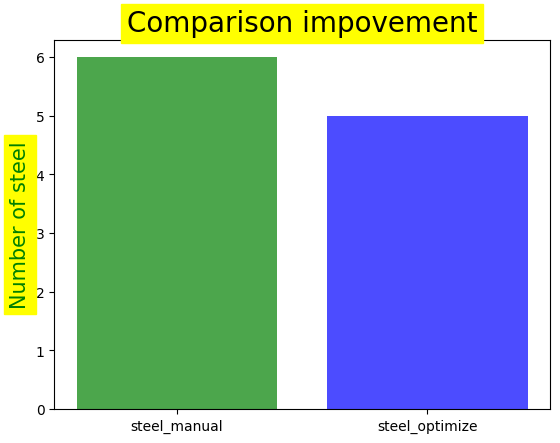

In [130]:
import matplotlib.pyplot as plt
print(f'                   Reduct Metal: {abs(6-5)} piece : { round(abs((6-5)/6)*100 ,2) } %')
plt.figure()
x = np.array(['steel_manual' , 'steel_optimize'])
y = np.array([6,5])
plt.bar(x,y, color = ['green','blue'] , alpha = 0.7) # alpha=  คววามเค้ม
#plt.xlabel('compare impovement')
plt.ylabel('Number of steel',size =15 ,color ="green" ,backgroundcolor = 'yellow')
plt.title('Comparison impovement' ,size =20 , color = 'black',backgroundcolor = 'yellow' )
plt.show()



                   Reduct Scrap Metal: 1135 mm. : 48.53 %


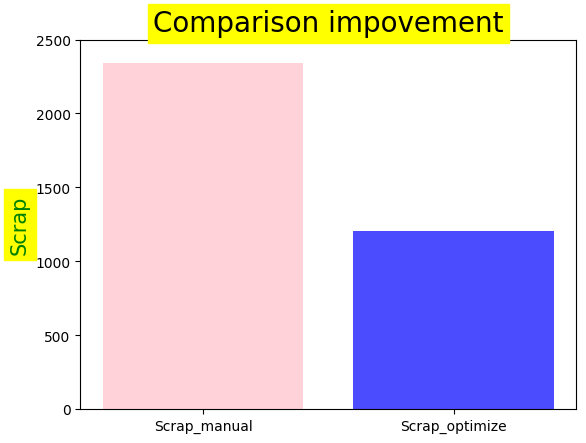

In [131]:
print(f'                   Reduct Scrap Metal: {abs(2339-1204)} mm. : { round(abs((2339-1204)/2339)*100 ,2) } %')
plt.figure()
x = np.array(['Scrap_manual' , 'Scrap_optimize'])
y = np.array([2339,lose_total]) #2339 1204
plt.bar(x,y, color = ['pink','blue'] , alpha = 0.7)
plt.title('Comparison impovement' ,size =20 , color = 'black',backgroundcolor = 'yellow' )
plt.ylabel('Scrap',size =15 ,color ="green" ,backgroundcolor = 'yellow')
plt.ylim(0, 2500)
plt.show()


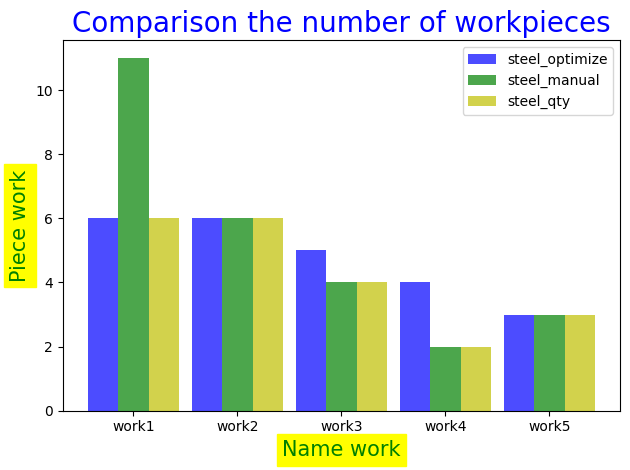

In [132]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 5
steel_optimize = [6,6,5,4,3]
stell_manual = [11,6,4,2,3]
steel_qty = [6,6,4,2,3]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.29
opacity = 0.7                 

rects1 = plt.bar(index ,steel_optimize , bar_width,
alpha=opacity,
color='b',
label='steel_optimize')

rects2 = plt.bar(index + bar_width, stell_manual, bar_width,
alpha=opacity,
color='g',
label='steel_manual')


rects3 = plt.bar(index + 2*bar_width, steel_qty, bar_width,
alpha=opacity,
color='y',
label='steel_qty')



plt.xlabel('Name work',size =15 ,color ="green" ,backgroundcolor = 'yellow')
plt.ylabel('Piece work',size =15 ,color ="green" ,backgroundcolor = 'yellow')
plt.title('Comparison the number of workpieces' ,size =20 , color = 'blue' )
plt.xticks(index +bar_width, ['work1', 'work2', 'work3', 'work4' ,'work5'])
plt.legend()

plt.tight_layout()
plt.show()

In [133]:
'''
# import pandas library
import pandas as pd

# dictionary
details = {
	'Ankit' : 22,
	'Golu' : 21,
	'hacker' : 23
	}

# creating a Dataframe object from a list
# of tuples of key, value pair
df = pd.DataFrame(list(details.items()))

df
'''

"\n# import pandas library\nimport pandas as pd\n\n# dictionary\ndetails = {\n\t'Ankit' : 22,\n\t'Golu' : 21,\n\t'hacker' : 23\n\t}\n\n# creating a Dataframe object from a list\n# of tuples of key, value pair\ndf = pd.DataFrame(list(details.items()))\n\ndf\n"

In [134]:
'''
# import pandas as pd
import pandas as pd

# list of strings
lst = ['Geeks', 'For', 'Geeks', 'is', 'portal', 'for', 'Geeks']

# list of int
lst2 = [11, 22, 33, 44, 55, 66, 77]
lst3 = [10, 22, 33, 44, 55, 66, 77]
# Calling DataFrame constructor after zipping
# both lists, with columns specified
df = pd.DataFrame(list(zip(lst, lst2,lst3  )))
df
'''

"\n# import pandas as pd\nimport pandas as pd\n\n# list of strings\nlst = ['Geeks', 'For', 'Geeks', 'is', 'portal', 'for', 'Geeks']\n\n# list of int\nlst2 = [11, 22, 33, 44, 55, 66, 77]\nlst3 = [10, 22, 33, 44, 55, 66, 77]\n# Calling DataFrame constructor after zipping\n# both lists, with columns specified\ndf = pd.DataFrame(list(zip(lst, lst2,lst3  )))\ndf\n"